In [1]:
import os
import glob
import narla
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/home/jott1/python_environments/narla/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
RESULTS_DIRECTORY = "../RunnerResults/"

# !tree -d $RESULTS_DIRECTORY

In [3]:
NUMBER_OF_COLUMNS = 4

trial_folders = sorted(list(glob.glob(os.path.join(RESULTS_DIRECTORY, "*"))))
number_of_trials = len(trial_folders)

number_of_rows = np.ceil(number_of_trials / NUMBER_OF_COLUMNS)
number_of_rows = int(number_of_rows)

/home/jott1/python_environments/narla/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


<Figure size 2000x3000 with 0 Axes>

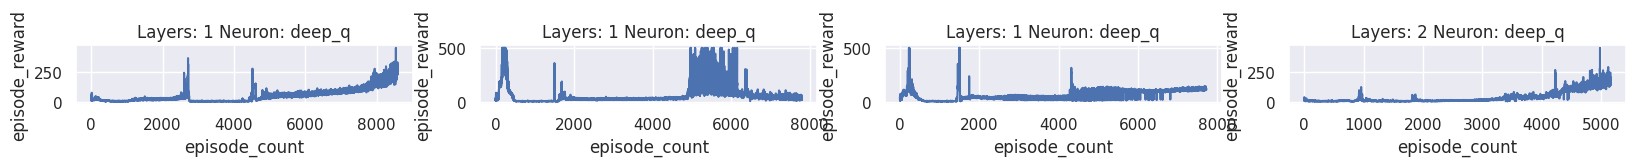

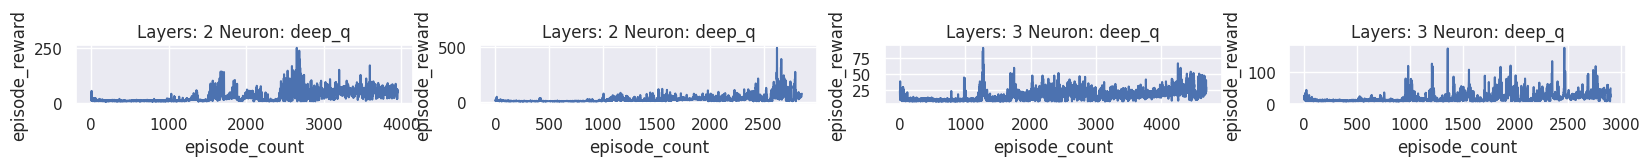

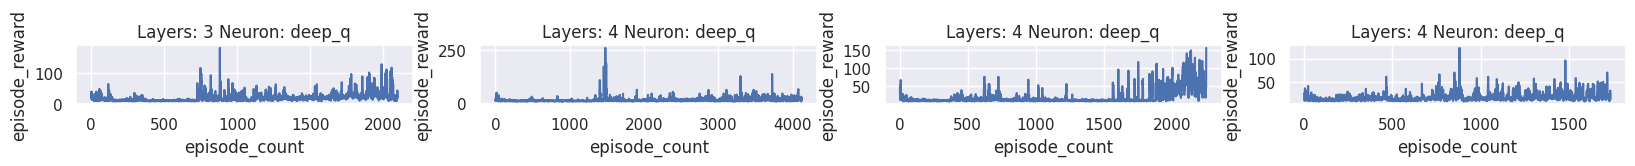

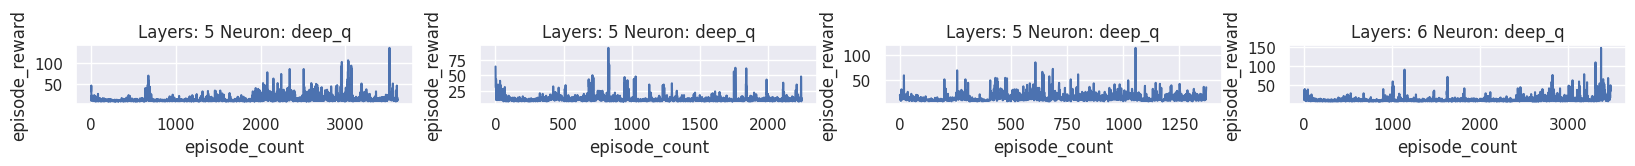

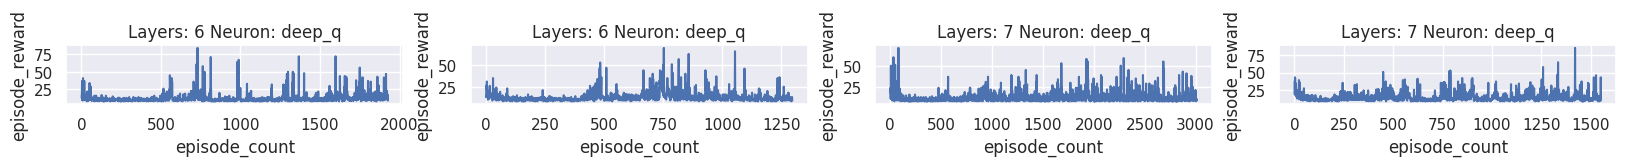

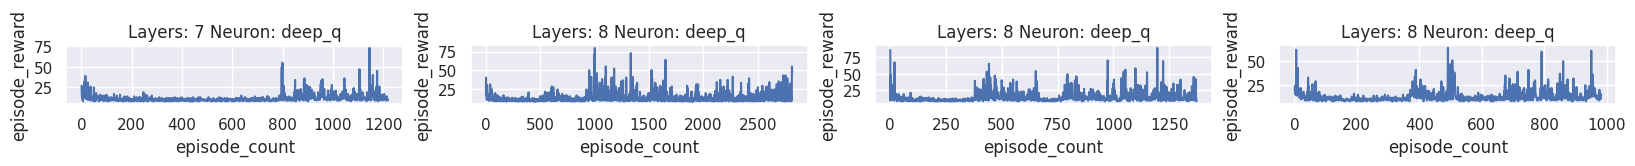

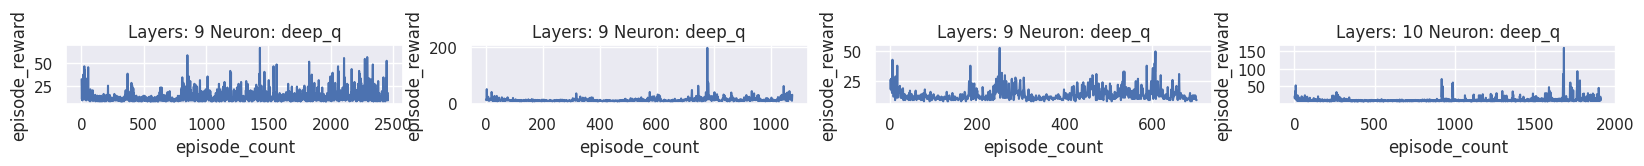

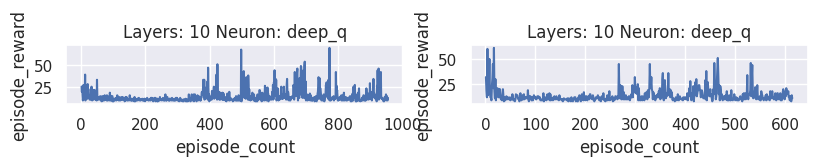

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

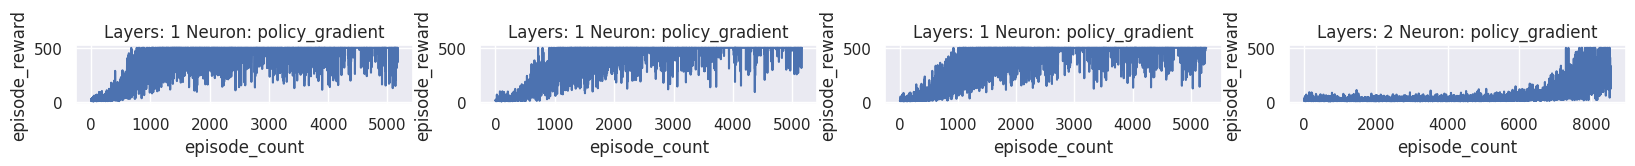

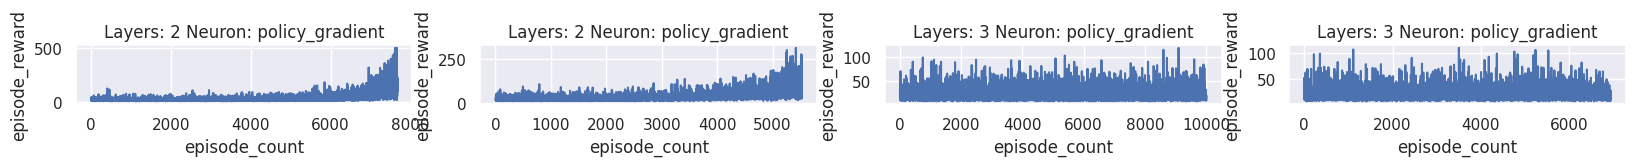

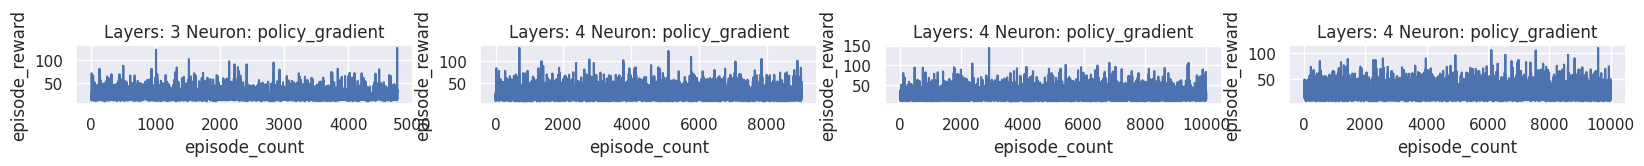

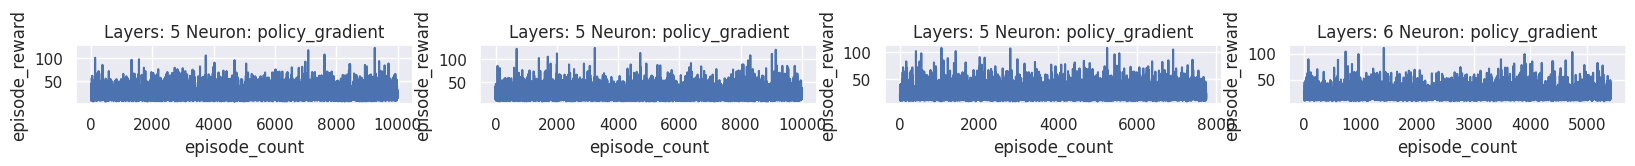

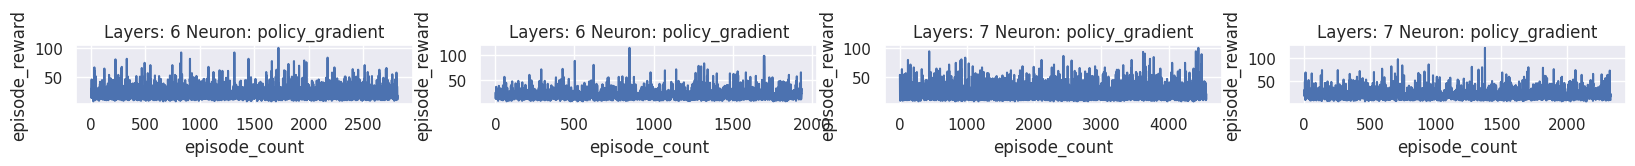

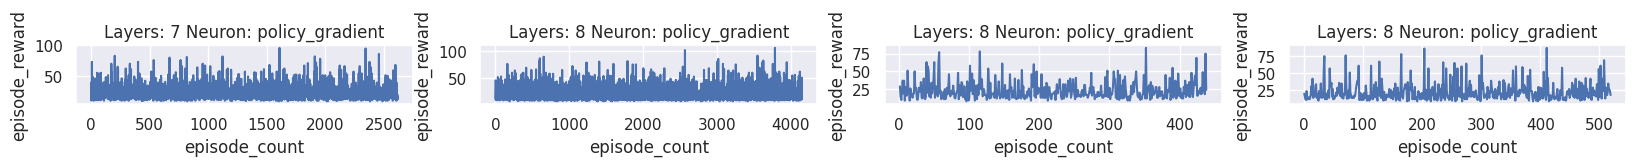

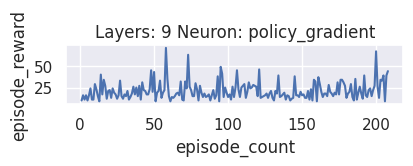

In [4]:
plt.figure(figsize=(20, 30))

for index, trial_folder in enumerate(trial_folders):
    if not os.path.isdir(trial_folder):
        continue

    settings = narla.io.load_settings(os.path.join(trial_folder, "settings.yaml"))
    results_file = os.path.join(trial_folder, "results.csv")

    if index % NUMBER_OF_COLUMNS == 0:
        plt.figure(figsize=(20, 20))
        
    if os.path.exists(results_file):
        results = narla.io.load_csv(results_file)
    
        plt.subplot(number_of_rows, NUMBER_OF_COLUMNS, index+1)
        
        sns.lineplot(
            x=narla.history.saved_data.EPISODE_COUNT,
            y=narla.history.reward_types.EPISODE_REWARD,
            data=results,
        )
        plt.title(f"Layers: {settings.number_of_layers} Neuron: {settings.neuron_type}")